#Zasoby

* Use BigQuery ML to make recommendations from movie ratings

* https://cloud.google.com/bigquery/docs/e2e-journey
* https://cloud.google.com/bigquery/docs/bigqueryml-mf-explicit-tutorial

* W tym samouczku dowiesz się, jak utworzyć model na podstawie jawnych opinii, korzystając ze `movielens1m` zbioru danych w celu sformułowania rekomendacji na podstawie identyfikatora filmu i identyfikatora użytkownika.

#Cele

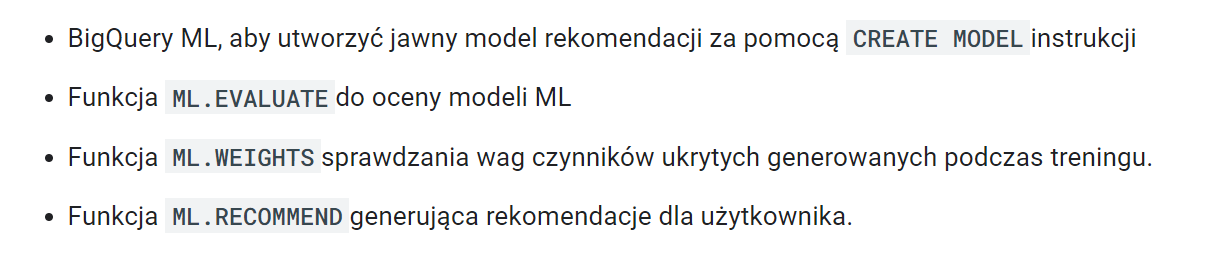

#Załaduj zbiór danych Movielens - 2 pliki (Krok 1)

* https://files.grouplens.org/datasets/movielens/

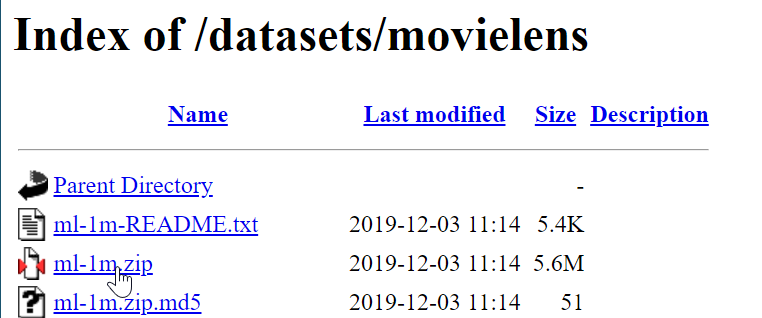

In [ ]:
%%bigquery

curl -O 'http://files.grouplens.org/datasets/movielens/ml-1m.zip'
unzip ml-1m.zip
sed 's/::/,/g' ml-1m/ratings.dat > ratings.csv

bq load --source_format=CSV pmackowka_us.table_0111 ratings.csv \
  user_id:INT64,item_id:INT64,rating:FLOAT64,timestamp:TIMESTAMP

In [ ]:
%%bigquery

curl -O 'http://files.grouplens.org/datasets/movielens/ml-1m.zip'
unzip ml-1m.zip
sed 's/::/@/g' ml-1m/movies.dat > movie_titles.csv

bq load --source_format=CSV --field_delimiter=@ \
 pmackowka_us.table_0112 movie_titles.csv \
 movie_id:INT64,movie_title:STRING,genre:STRING

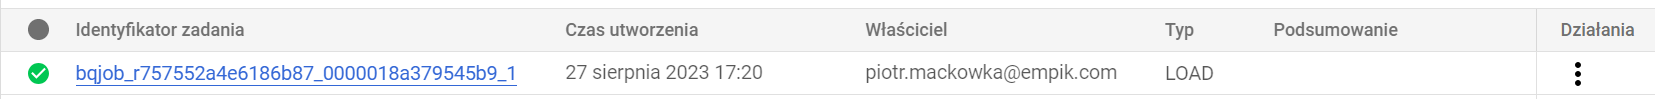

In [ ]:
# pmackowka_us.table_0111 => movielens.movielens_1m
# pmackowka_us.table_0112 => movielens.movie_titles

#Create your explicit recommendations model (Krok 2)

In [ ]:
{CREATE MODEL | CREATE MODEL IF NOT EXISTS | CREATE OR REPLACE MODEL}
model_name
OPTIONS(MODEL_TYPE = 'MATRIX_FACTORIZATION'
        FEEDBACK_TYPE = {'EXPLICIT' | 'IMPLICIT'},
        NUM_FACTORS = int64_value,
        USER_COL = string_value, # Nazwa kolumny użytkownika dla modeli faktoryzacji macierzy.
        ITEM_COL = string_value, # Nazwa kolumny pozycji dla modeli faktoryzacji macierzy.
        RATING_COL = string_value,
        WALS_ALPHA = float64_value,
        L2_REG = float64_value,
        MAX_ITERATIONS = int64_value,
        EARLY_STOP = { TRUE | FALSE },
        MIN_REL_PROGRESS = float64_value,
        DATA_SPLIT_METHOD = { 'AUTO_SPLIT' | 'RANDOM' | 'CUSTOM' | 'SEQ' | 'NO_SPLIT' },
        DATA_SPLIT_EVAL_FRACTION = float64_value,
        DATA_SPLIT_COL = string_value)
AS query_statement

In [ ]:
%%bigquery

CREATE OR REPLACE MODEL pmackowka_us.model_0111
OPTIONS
  (model_type='matrix_factorization',
   user_col='user_id',
   item_col='item_id',
   l2_reg=9.83,
   num_factors=34) AS

SELECT
  user_id,
  item_id,
  rating
FROM pmackowka_us.table_0111

Training Matrix Factorization models is not available for on-demand usage. To train, please set up a reservation (flex or regular) based on instructions in BigQuery public docs.

https://cloud.google.com/bigquery/docs/reservations-intro

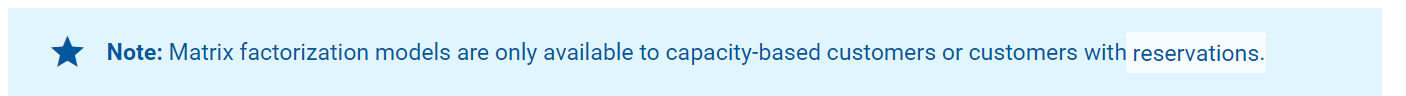